In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2]

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)
X = df.drop("MEDV",axis=1)
y = df["MEDV"]

linear_regression = LinearRegression()
linear_regression.fit(X,y)

prediction = linear_regression.predict(X)

def my_r2_score(y_true, y_hat):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    scikit_r2 = r2_score(y_true, y_hat)
    
    print(f'R-squared (SS_explained / SS_Total) = {ss_explained / ss_total}\n' + \
          f'R-squared (1 - (SS_residual / SS_Total)) = {1 - (ss_residual / ss_total)}\n'+ \
          f"Scikit-Learn's R-squared = {scikit_r2}")

print('Positive R-squared\n')
my_r2_score(y, prediction)

print('\n\nNegative R-squared\n')
my_r2_score(y, np.zeros(len(y)))

Positive R-squared

R-squared (SS_explained / SS_Total) = 0.7406426641094094
R-squared (1 - (SS_residual / SS_Total)) = 0.7406426641094094
Scikit-Learn's R-squared = 0.7406426641094094


Negative R-squared

R-squared (SS_explained / SS_Total) = 6.01433345492424
R-squared (1 - (SS_residual / SS_Total)) = -6.0143334549242375
Scikit-Learn's R-squared = -6.0143334549242375


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression

df['RAD'] = df['RAD'].astype('int')
df['CHAS'] = df['CHAS'].astype('int')

np.random.seed(11)
X['random1'] = np.random.randn(len(X))
X['random2'] = np.random.randint(len(X))
X['random3'] = np.random.normal(len(X))

mutual_info = mutual_info_regression(X, y, discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

LSTAT      0.667868
RM         0.528050
INDUS      0.466544
NOX        0.465254
PTRATIO    0.434514
TAX        0.361041
CRIM       0.341827
AGE        0.309333
DIS        0.300009
RAD        0.210613
ZN         0.198132
B          0.159204
CHAS       0.020946
random1    0.000000
random2    0.000000
random3    0.000000
dtype: float64

In [17]:
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_new = X.iloc[:, :i].copy()
    linear_regression = LinearRegression()
    linear_regression.fit(X_new, y)
    
    prediction = linear_regression.predict(X_new)
    r2 = r2_score(y_true=y, y_pred=prediction)
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2}, index=[i]))

result_df

C:\Users\Sean\AppData\Local\Temp\ipykernel_13480\3859772776.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13480\3859772776.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13480\3859772776.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2': r2,
C:\Users\Sean\AppData\Local\Temp\ipykernel_13480\3859772776.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.D

,r2,adj_r2
1,0.150780,0.149096
2,0.233988,0.230943
3,0.293714,0.289493
4,0.329528,0.324175
5,0.331313,0.324626
6,0.587377,0.582416
7,0.589490,0.583720
8,0.631149,0.625212
9,0.631948,0.625269
10,0.639663,0.632383


<Axes: >

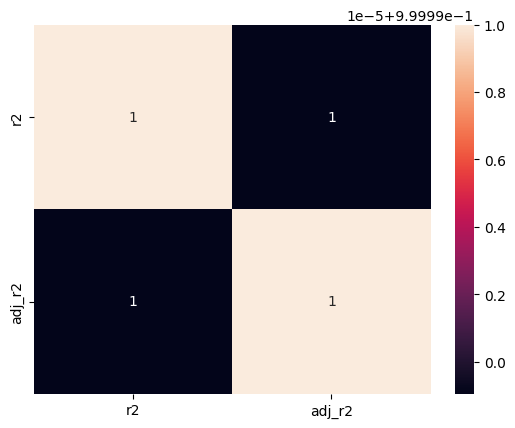

In [23]:
sns.heatmap(result_df.corr(),annot=True)

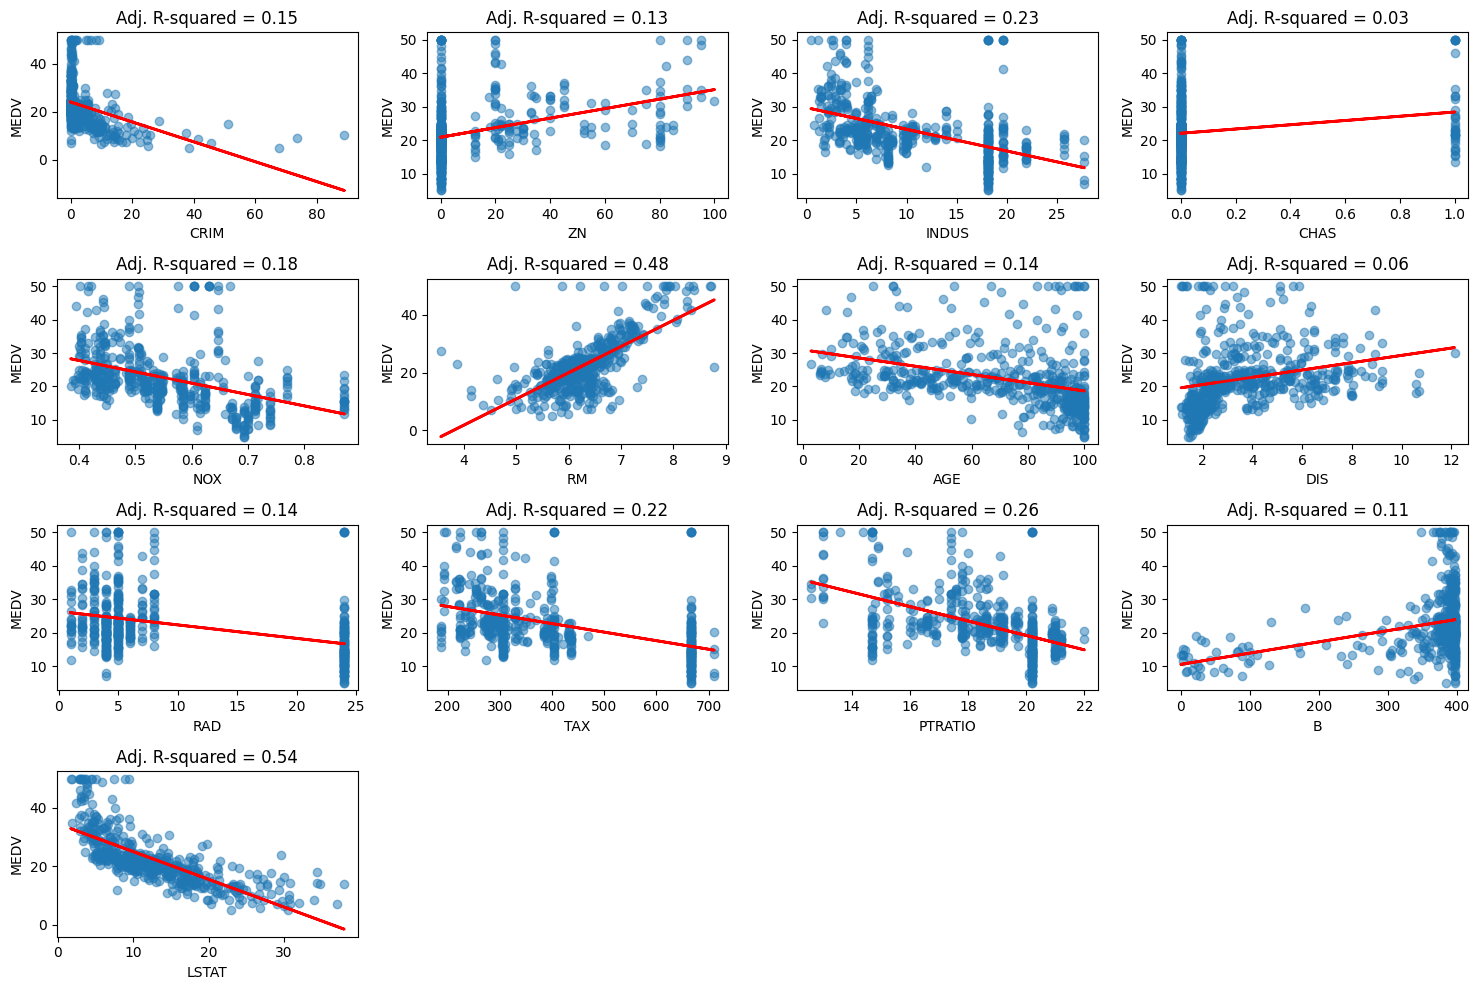

In [20]:
import matplotlib.pyplot as plt

def adjusted_r2(y_true, y_pred, n_samples, n_features):
    r_squared = r2_score(y_true, y_pred)
    adj_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    return adj_r_squared

# Initialize a figure
plt.figure(figsize=(15, 10))

# Iterate through each feature column (excluding 'MEDV')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    
    # Scatter plot
    plt.scatter(df[col], df['MEDV'], alpha=0.5)
    
    # Fit a linear regression model
    X = df[[col]]
    y = df['MEDV']
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    y_pred = model.predict(X)
    
    # Calculate adjusted R-squared
    adj_r_squared = adjusted_r2(y, y_pred, len(y), 1)
    
    # Plot the regression line
    plt.plot(X, y_pred, color='red', linewidth=2)
    
    # Set labels and title
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'Adj. R-squared = {adj_r_squared:.2f}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()





C:\Users\Sean\AppData\Local\Temp\ipykernel_13480\2942257473.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = adj_r_squared_df.corr()


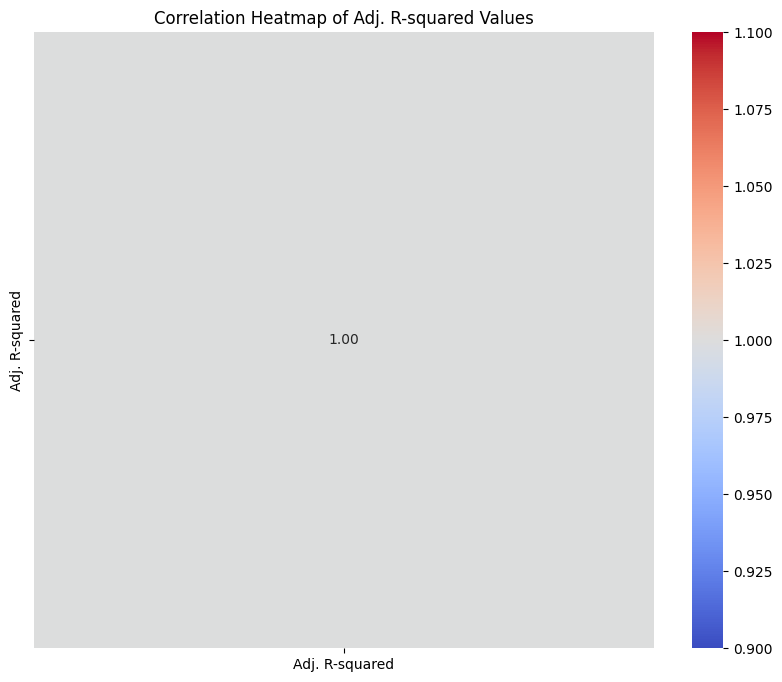

In [21]:
import seaborn as sns

adj_r_squared_values = []

# Iterate through each feature column (excluding 'MEDV')
for col in df.columns[:-1]:
    # Fit a linear regression model
    X = df[[col]]
    y = df['MEDV']
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    y_pred = model.predict(X)
    
    # Calculate adjusted R-squared
    adj_r_squared = adjusted_r2(y, y_pred, len(y), 1)
    
    adj_r_squared_values.append(adj_r_squared)

# Create a DataFrame to hold the adjusted R-squared values and their corresponding variable names
adj_r_squared_df = pd.DataFrame({'Variable': df.columns[:-1], 'Adj. R-squared': adj_r_squared_values})

# Calculate the correlation matrix between adjusted R-squared values
correlation_matrix = adj_r_squared_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Adj. R-squared Values')
plt.show()